In [1]:
%matplotlib inline

import seaborn as sns
import pandas as pd
from libpysal import weights
from libpysal.io import open as psopen
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read data
db = gpd.read_file("./week12data/tracts_2010_lc.shp")

# Index table on the GEOID
db = db.set_index("GEOID10", drop=False)

# Display summary
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 74 entries, 31109001302 to 31109001200
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    74 non-null     int64   
 1   STATEFP10   74 non-null     object  
 2   COUNTYFP10  74 non-null     object  
 3   TRACTCE10   74 non-null     object  
 4   GEOID10     74 non-null     object  
 5   NAME10      74 non-null     object  
 6   NAMELSAD10  74 non-null     object  
 7   MTFCC10     74 non-null     object  
 8   FUNCSTAT10  74 non-null     object  
 9   ALAND10     74 non-null     int64   
 10  AWATER10    74 non-null     int64   
 11  INTPTLAT10  74 non-null     object  
 12  INTPTLON10  74 non-null     object  
 13  GDB_GEOMAT  0 non-null      float64 
 14  Shape__Are  74 non-null     float64 
 15  Shape__Len  74 non-null     float64 
 16  geometry    74 non-null     geometry
dtypes: float64(3), geometry(1), int64(3), object(10)
memory usage: 12.5+ KB


In [3]:
db.crs
#wgs84

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
#let's project it (in place)
db = db.to_crs(epsg=26914) # EPSG for NAD84 UTM 14N

In [9]:
# Weights matrix under queen contiguity
w_queen = weights.Queen.from_dataframe(db, idVariable="GEOID10")
w_queen

In [44]:
db.head()

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,GDB_GEOMAT,Shape__Are,Shape__Len,geometry
GEOID10,,,,,,,,,,,,,,,,,
31109001302,375,31,109,001302,31109001302,13.02,Census Tract 13.02,G5020,S,2176814,0,+40.7927167,-096.6340321,None,2.341853e+07,20361.716815,"POLYGON ((699870.923 4519138.802, 700042.809 4..."
31109001400,376,31,109,001400,31109001400,14,Census Tract 14,G5020,S,2726305,0,+40.8064054,-096.6532808,None,2.932990e+07,21984.171116,"POLYGON ((698131.027 4519091.635, 698037.039 4..."
31109001500,377,31,109,001500,31109001500,15,Census Tract 15,G5020,S,2807893,0,+40.7932287,-096.6560502,None,3.020778e+07,25712.716123,"POLYGON ((696418.208 4518798.073, 696414.116 4..."
31109001600,378,31,109,001600,31109001600,16,Census Tract 16,G5020,S,2572821,0,+40.8064997,-096.6728453,None,2.767876e+07,21877.890524,"POLYGON ((695874.101 4520653.849, 695955.919 4..."
31109001700,379,31,109,001700,31109001700,17,Census Tract 17,G5020,S,1263366,0,+40.8031881,-096.6894790,None,1.359143e+07,17301.104765,"POLYGON ((695260.378 4519017.706, 695165.541 4..."


In [46]:
# Let's look at the neighbors for a random tract
w_queen['31109001700']
# output is a dict

{'31109001600': 1.0,
 '31109002200': 1.0,
 '31109001900': 1.0,
 '31109001500': 1.0,
 '31109002001': 1.0,
 '31109002500': 1.0,
 '31109001800': 1.0,
 '31109002300': 1.0}

In [47]:
# Pairwise comparison
w_queen['31109001700']['31109002500']

1.0

In [48]:
# not neighbors, not in the dict, will return an error
w_queen['31109001700']['31109001400']


KeyError: '31109001400'

In [49]:
# ask the dict for neighbors
w_queen.neighbors['31109001700']
# looks similar to the dict, but is a list

['31109001600',
 '31109002200',
 '31109001900',
 '31109001500',
 '31109002001',
 '31109002500',
 '31109001800',
 '31109002300']

In [50]:
# weights
w_queen.weights['31109001700']

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [51]:
# how many neighbors does our tract have?
w_queen.cardinalities['31109001700']

8

In [52]:
# cardinalities of ALL tracts
queen_card = pd.Series(w_queen.cardinalities)
queen_card.head()

31109000100    6
31109000201    4
31109000202    5
31109000300    6
31109000400    8
dtype: int64

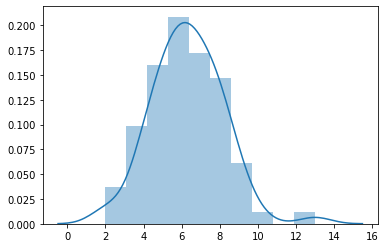

In [24]:
# quick histogram of neighbors in dataset
sns.distplot(queen_card, bins=10)

In [53]:
# stats

# Number of observations
w_queen.n

74

In [54]:
# Average number of neighbors
w_queen.mean_neighbors

6.324324324324325

In [55]:
# Min number of neighbors
w_queen.min_neighbors

2

In [56]:
# Max number of neighbors
w_queen.max_neighbors

13

In [57]:
# Islands (observations disconnected)
w_queen.islands

[]

In [58]:
# IDs in order (first 5)
w_queen.id_order[:5]

['31109000100', '31109000201', '31109000202', '31109000300', '31109000400']

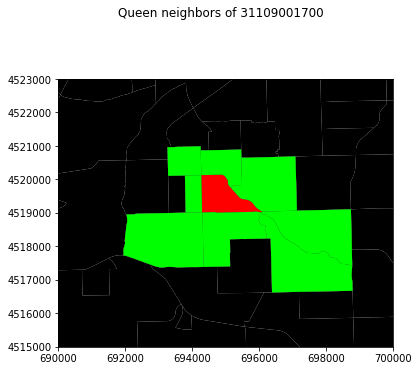

In [63]:
# plot, style, zoom in

# Setup figure
f, ax = plt.subplots(1, figsize=(6, 6))

# Plot base layer of polygons
db.plot(ax=ax, facecolor='k', linewidth=0.1)

# Select focal polygon geometry
focus = db.loc[['31109001700'], ['geometry']]

# Plot focal polygon
focus.plot(facecolor='red', alpha=1, linewidth=0, ax=ax)

# Plot neighbors
neis = db.loc[w_queen['31109001700'], :]
neis.plot(ax=ax, facecolor='lime', linewidth=0)

# Title
f.suptitle("Queen neighbors of 31109001700")

# Style, zoom, and display on screen
ax.set_ylim(4515000, 4523000)
ax.set_xlim(690000, 700000)
plt.show()

In [66]:
w_rook = weights.Rook.from_dataframe(db, idVariable="GEOID10")
w_rook

In [67]:
# Let's look at the neighbors for a random tract
w_rook['31109001700']
# output is a dict

{'31109001600': 1.0,
 '31109002200': 1.0,
 '31109002300': 1.0,
 '31109001800': 1.0,
 '31109002001': 1.0,
 '31109002500': 1.0,
 '31109001500': 1.0}

In [68]:
# rook cardinalities of ALL tracts
rook_card = pd.Series(w_rook.cardinalities)
rook_card.head()

31109000100    6
31109000201    4
31109000202    4
31109000300    5
31109000400    7
dtype: int64

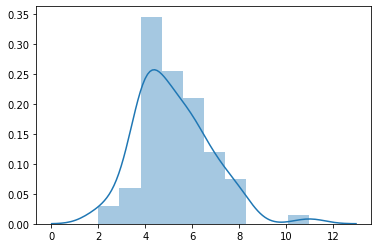

In [69]:
# quick histogram of neighbors in dataset
sns.distplot(rook_card, bins=10)

In [70]:
# Average number of neighbors
w_rook.mean_neighbors

5.1891891891891895

In [72]:
# can compare the two averages
w_queen.mean_neighbors - w_rook.mean_neighbors

1.135135135135135

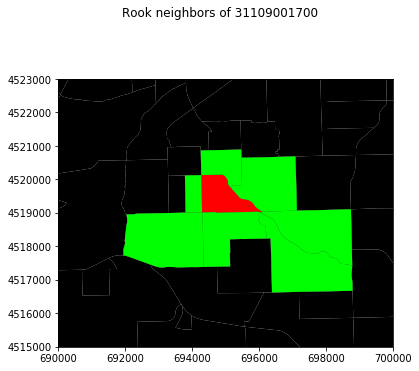

In [73]:
# plot, style, zoom in

# Setup figure
f, ax = plt.subplots(1, figsize=(6, 6))

# Plot base layer of polygons
db.plot(ax=ax, facecolor='k', linewidth=0.1)

# Select focal polygon geometry
focus = db.loc[['31109001700'], ['geometry']]

# Plot focal polygon
focus.plot(facecolor='red', alpha=1, linewidth=0, ax=ax)

# Plot neighbors
neis = db.loc[w_rook['31109001700'], :]
neis.plot(ax=ax, facecolor='lime', linewidth=0)

# Title
f.suptitle("Rook neighbors of 31109001700")

# Style, zoom, and display on screen
ax.set_ylim(4515000, 4523000)
ax.set_xlim(690000, 700000)
plt.show()
# looks a bit different than the queen contiguity

In [74]:
### DISTANCE

In [76]:
# k nearest-neighbors
knn5 = weights.KNN.from_dataframe(db, k=5)
knn5

In [83]:
knn5['31109001700']

{'31109002001': 1.0,
 '31109001800': 1.0,
 '31109002300': 1.0,
 '31109002002': 1.0,
 '31109001600': 1.0}

In [78]:
# distance band
# binary output: 1 for inside the radius, 0 for outside

w_dist1kmB = weights.DistanceBand.from_dataframe(db, 1000)

/Users/pbitterman2/opt/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 62 disconnected components.
 There are 56 islands with ids: 31109001302, 31109001400, 31109001500, 31109001600, 31109002300, 31109002400, 31109002500, 31109002800, 31109003003, 31109003102, 31109983200, 31109003202, 31109003709, 31109003604, 31109003704, 31109003706, 31109003801, 31109003802, 31109010100, 31109003500, 31109003717, 31109001102, 31109001101, 31109010202, 31109003302, 31109003401, 31109003720, 31109003716, 31109003714, 31109003713, 31109003719, 31109003301, 31109003104, 31109010201, 31109003402, 31109003608, 31109003607, 31109003715, 31109003609, 31109003718, 31109003001, 31109010300, 31109010400, 31109002200, 31109003707, 31109000100, 31109002900, 31109003708, 31109000201, 31109000202, 31109000300, 31109000400, 31109000800, 31109000900, 31109001301, 31109001200.
  warnings.warn(message)


In [79]:
w_dist1kmB['31109001700']

{'31109001800': 1.0, '31109002001': 1.0}

In [84]:
# inverse distance weighted
w_dist1kmC = weights.DistanceBand.from_dataframe(db, 1000, binary=False) # note binary flag

In [85]:
w_dist1kmC['31109001700']

{'31109001800': 0.001046725366805059, '31109002001': 0.0011497014612582065}

In [86]:
### Transformations

w_queen.transform 
# output of 'O' means "original"

'O'

In [88]:
w_queen['31109001700'] # look at what we did originally

{'31109001600': 1.0,
 '31109002200': 1.0,
 '31109001900': 1.0,
 '31109001500': 1.0,
 '31109002001': 1.0,
 '31109002500': 1.0,
 '31109001800': 1.0,
 '31109002300': 1.0}

In [89]:
w_queen.transform  = 'R' # Row-standardize it

In [90]:
w_queen['31109001700'] # now check

{'31109001600': 0.125,
 '31109002200': 0.125,
 '31109001900': 0.125,
 '31109001500': 0.125,
 '31109002001': 0.125,
 '31109002500': 0.125,
 '31109001800': 0.125,
 '31109002300': 0.125}

In [91]:
pd.Series(w_queen['31109001700']).sum() # verify they sum to 1

1.0

In [92]:
# Compute spatial lag of `ALAND10`
w_queen_score = weights.lag_spatial(w_queen, db["ALAND10"])
# Print the first five elements
w_queen_score[:5]

array([3939483.83333333, 2829759.25      , 2600414.6       ,
       3591851.66666667, 5184564.        ])

In [96]:
# add the lagged variable to the data frame
db['w_area'] = w_queen_score


,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,GDB_GEOMAT,Shape__Are,Shape__Len,geometry,w_area
GEOID10,,,,,,,,,,,,,,,,,,
31109001302,375,31,109,001302,31109001302,13.02,Census Tract 13.02,G5020,S,2176814,0,+40.7927167,-096.6340321,None,2.341853e+07,20361.716815,"POLYGON ((699870.923 4519138.802, 700042.809 4...",3.939484e+06
31109001400,376,31,109,001400,31109001400,14,Census Tract 14,G5020,S,2726305,0,+40.8064054,-096.6532808,None,2.932990e+07,21984.171116,"POLYGON ((698131.027 4519091.635, 698037.039 4...",2.829759e+06
31109001500,377,31,109,001500,31109001500,15,Census Tract 15,G5020,S,2807893,0,+40.7932287,-096.6560502,None,3.020778e+07,25712.716123,"POLYGON ((696418.208 4518798.073, 696414.116 4...",2.600415e+06
31109001600,378,31,109,001600,31109001600,16,Census Tract 16,G5020,S,2572821,0,+40.8064997,-096.6728453,None,2.767876e+07,21877.890524,"POLYGON ((695874.101 4520653.849, 695955.919 4...",3.591852e+06
31109001700,379,31,109,001700,31109001700,17,Census Tract 17,G5020,S,1263366,0,+40.8031881,-096.6894790,None,1.359143e+07,17301.104765,"POLYGON ((695260.378 4519017.706, 695165.541 4...",5.184564e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31109000700,500,31,109,000700,31109000700,7,Census Tract 7,G5020,S,843906,0,+40.8197299,-096.6881650,None,9.078797e+06,13421.683013,"POLYGON ((694483.633 4521421.458, 694588.912 4...",3.765412e+06
31109000800,501,31,109,000800,31109000800,8,Census Tract 8,G5020,S,1173587,0,+40.8183013,-096.6759144,None,1.262550e+07,15379.433592,"POLYGON ((695955.919 4520656.018, 695874.101 4...",4.949066e+06
31109000900,502,31,109,000900,31109000900,9,Census Tract 9,G5020,S,3862174,0,+40.8257449,-096.6628021,None,4.154933e+07,28190.763185,"POLYGON ((697875.521 4521365.880, 697882.503 4...",3.609473e+06


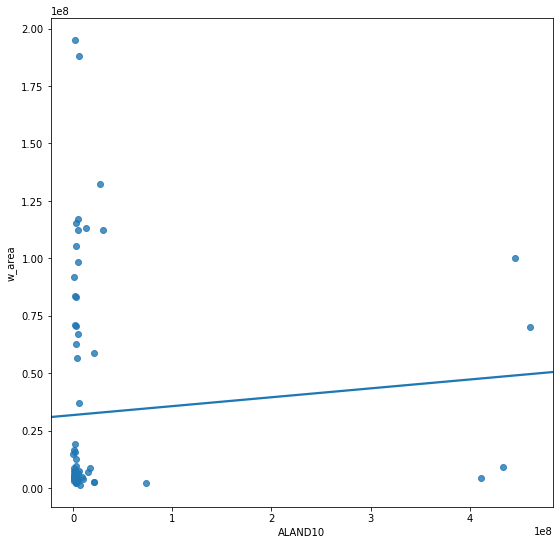

In [95]:
# scatter of area and lagged area

# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x="ALAND10", y="w_area", data=db, ci=None)
# Display
plt.show()

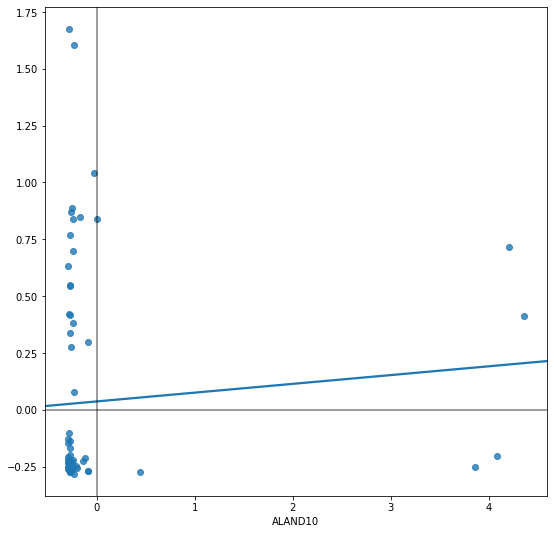

In [94]:
# Moran plot

# Standardize the area
std_db = (db['ALAND10'] - db['ALAND10'].mean()) / db['ALAND10'].std()
# Compute the spatial lag of the standardized version and save is as a 
# Series indexed as the original variable
std_w_db = pd.Series(weights.lag_spatial(w_queen, std_db), index=std_db.index)
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x=std_db, y=std_w_db, ci=None)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Display
plt.show()